## Problem 1

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('asteroids.csv')
data

,Serial,Asteroid,Dens,Error
0,1,Ceres,2.12,0.04
1,2,Pallas,2.71,0.11
2,4,Vesta,3.44,0.12
3,10,Hygiea,2.76,1.20
4,11,Parthenope,2.72,0.12
5,15,Eunomia,0.96,0.30
6,16,Psyche,2.00,0.60
7,20,Massalia,3.26,0.60
8,22,Kalliope,2.50,0.30
9,45,Eugenia,1.20,0.40


In [4]:
dens=data['Dens'].to_numpy()
logdens=np.log(dens)

stat,p=stats.shapiro(dens)
stat2,p2=stats.shapiro(logdens)

print('Test statistic for dens:',stat,' p-value:',p)
print('Test statistic for logdens:',stat2,' p-value:',p2)

Test statistic for dens: 0.9246721863746643  p-value: 0.051220282912254333
Test statistic for logdens: 0.9686306715011597  p-value: 0.5660613775253296


From the p-values it appears that the logarithm is closer to normality. The same can be observed in the following set of histograms.

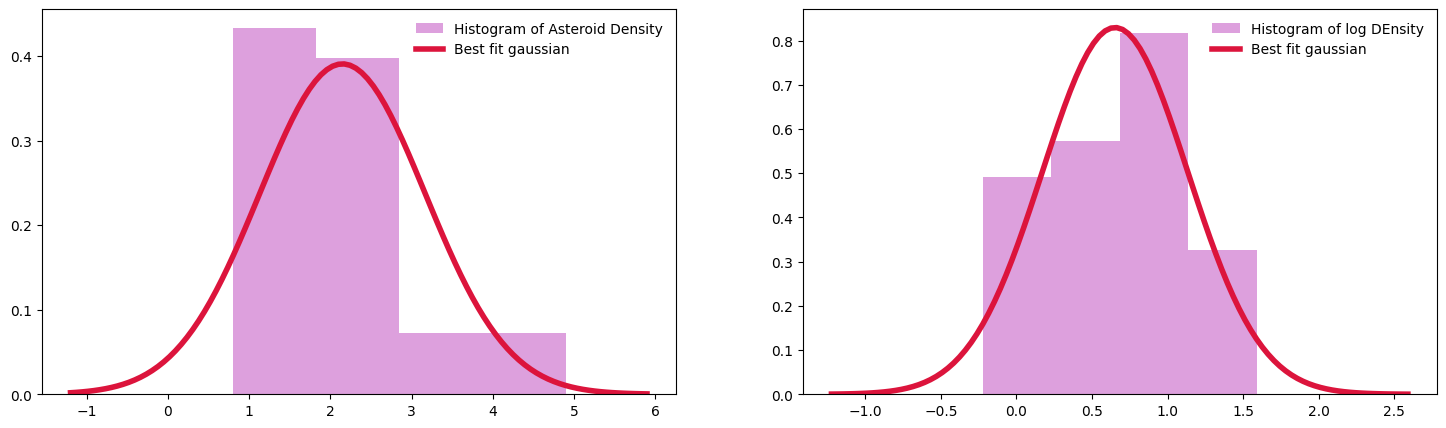

In [13]:
def gauss(x,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2/sigma/sigma)
x=np.linspace(min(dens)-2,max(dens)+1,100)
x2=np.linspace(min(logdens)-1,max(logdens)+1,100)

fig,ax=plt.subplots(1,2,figsize=(18,5))
ax[0].hist(dens,bins=4,density=True,color='plum',label='Histogram of Asteroid Density')
params=stats.norm.fit(dens)
ax[0].plot(x,gauss(x,params[0],params[1]),linewidth=4,color='crimson',label='Best fit gaussian')
ax[0].legend(frameon=False)

ax[1].hist(logdens,bins=4,density=True,color='plum',label='Histogram of log DEnsity')
params=stats.norm.fit(logdens)
ax[1].plot(x2,gauss(x2,params[0],params[1]),linewidth=4,color='crimson',label='Best fit gaussian')
ax[1].legend(frameon=False)

## Problem 2

In [19]:
data=np.genfromtxt('hipparcos.dat')
data

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [ 2.00000000e+00,  9.27000000e+00,  3.79700000e-03, ...,
        -9.30000000e-01,  3.10000000e+00,  9.99000000e-01],
       [ 3.80000000e+01,  8.65000000e+00,  1.11047000e-01, ...,
        -6.24000000e+01,  7.80000000e-01,  7.78000000e-01],
       ...,
       [ 1.18251000e+05,  8.16000000e+00,  3.59778318e+02, ...,
         3.56000000e+00,  8.20000000e-01,  6.52000000e-01],
       [ 1.18254000e+05,  7.72000000e+00,  3.59787381e+02, ...,
         4.40000000e+00,  8.00000000e-01,  5.63000000e-01],
       [ 1.18311000e+05,  1.18500000e+01,  3.59954685e+02, ...,
        -1.12810000e+02,  2.96000000e+00,  1.39100000e+00]])

In [20]:
data=data[1:]

In [21]:
data

array([[ 2.00000000e+00,  9.27000000e+00,  3.79700000e-03, ...,
        -9.30000000e-01,  3.10000000e+00,  9.99000000e-01],
       [ 3.80000000e+01,  8.65000000e+00,  1.11047000e-01, ...,
        -6.24000000e+01,  7.80000000e-01,  7.78000000e-01],
       [ 4.70000000e+01,  1.07800000e+01,  1.35192000e-01, ...,
        -1.45900000e+02,  1.97000000e+00,  1.15000000e+00],
       ...,
       [ 1.18251000e+05,  8.16000000e+00,  3.59778318e+02, ...,
         3.56000000e+00,  8.20000000e-01,  6.52000000e-01],
       [ 1.18254000e+05,  7.72000000e+00,  3.59787381e+02, ...,
         4.40000000e+00,  8.00000000e-01,  5.63000000e-01],
       [ 1.18311000e+05,  1.18500000e+01,  3.59954685e+02, ...,
        -1.12810000e+02,  2.96000000e+00,  1.39100000e+00]])

In [39]:
hyades=[]
nonhyades=[]
for i in range(len(data)):
    if (50<data[i][2]<100) and (0<data[i][3]<25) and (90<data[i][5]<130) and (-60<data[i][6]<-10):
        hyades.append(data[i])
    else:
        nonhyades.append(data[i])

In [40]:
t,p = stats.ttest_ind(hyades,nonhyades)
print(t[-1],p[-1])

-3.8604369218609285 0.0001158222219244154


The p-value here is very less so we need to reject the null hypothesis that Hyades and non Hyades star indeed have the same colour. They don't.

## Problem 3

In [55]:
data=np.log10(np.loadtxt('bepposax.dat'))
data

array([0.47712125, 1.04139269, 1.14612804, ..., 2.0374265 , 0.64836001,
       1.5563025 ])

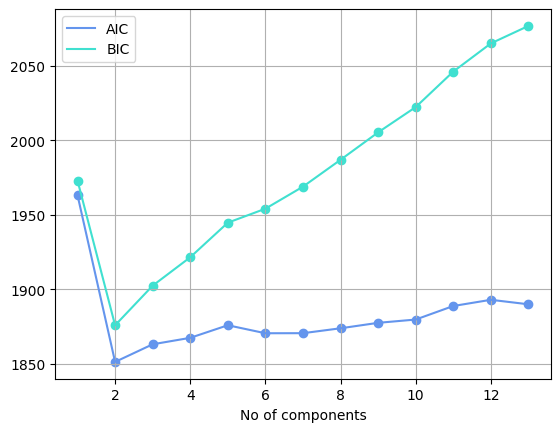

In [60]:
from sklearn.mixture import GaussianMixture

N = np.arange(1, 14)
data=data.reshape(-1,1)

def compute_GaussianMixture(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter,covariance_type=covariance_type)
        models[i].fit(data)
    return models

models = compute_GaussianMixture(N)

AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]

fig,ax=plt.subplots()
ax.scatter(N,AIC,color='cornflowerblue')
ax.scatter(N,BIC,color='turquoise')
ax.plot(N,AIC,color='cornflowerblue',label='AIC')
ax.plot(N,BIC,color='turquoise',label='BIC')
ax.set_xlabel('No of components')
ax.grid()
ax.legend()

Clearly the minimum here is attained with a 2 component model, and thats the optimum number of Gaussian components that fits the data best.